In [12]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
from matplotlib import rcParams
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
%matplotlib inline
import seaborn as sns
from math import factorial, sqrt
from functuser import *
from numerize.numerize import numerize
import scipy.stats as stats

In [13]:
insurance_data = pd.read_csv('./data/insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
# import ROBOTO
load_roboto()

# set style
seaborn = 'seaborn-white'
mpl = 'fivethirtyeight'

# color palette
male_cat = '#a2d2ff'
female_cat = '#ffc8dd'
hist_sn = '#bde0fe'
dist_sn = '#e63946' 
bmiL25_cat ='#8ac926'
bmiM25_cat = '#ff595e'
smoker_cat = '#6930c3'
nosmoker_cat = '#72efdd'


In [15]:
smoker = insurance_data.loc[insurance_data['smoker'] == 'yes']
no_smoker = insurance_data.loc[insurance_data['smoker'] == 'no']

male_smoker = smoker[smoker['sex'] == 'male']  
female_smoker = smoker[smoker['sex'] == 'female']  

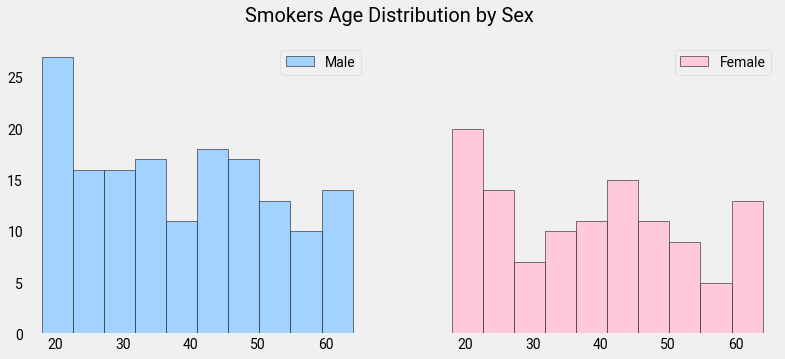

In [16]:
with plt.style.context(mpl): # set temporary style
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True,sharex=True)

    ax1.hist(male_smoker['age'], edgecolor='black', color=male_cat, label='Male')
    ax2.hist(female_smoker['age'], edgecolor='black', color=female_cat, label='Female')

    ax1.grid(visible=False)
    ax2.grid(visible=False)

    plt.suptitle("Smokers Age Distribution by Sex", fontsize=20)
    ax1.title.set_size(16)
    ax2.title.set_size(16)

    ax1.legend()
    ax2.legend()

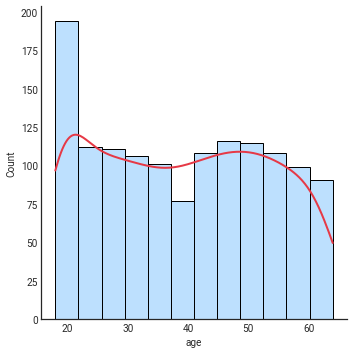

In [17]:
with plt.style.context(seaborn):
    sns.displot(data=insurance_data, x='age', kde=True, edgecolor='black', facecolor=hist_sn, color=dist_sn, line_kws={'lw': 2});

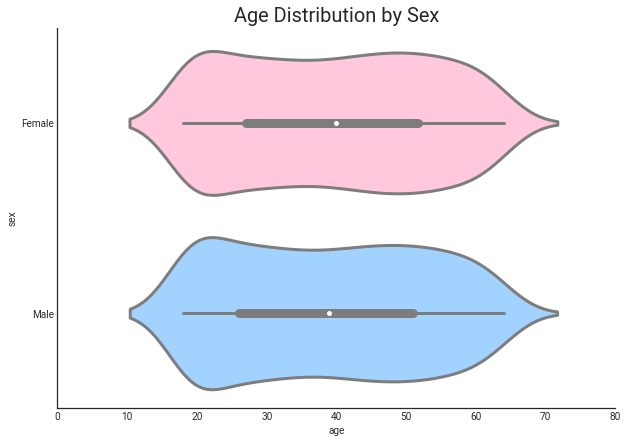

In [18]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(10, 7))
    my_pal = {"female": female_cat, "male": male_cat}
    sns.violinplot(ax=ax, x ='age', y ='sex', data = insurance_data, palette = my_pal, saturation=1, linewidth=3)
    ax.set_title('Age Distribution by Sex', size=20, fontweight="bold")
    ax.set_yticklabels(['Female', 'Male'])
    ax.set_xlim(0, 80)
    

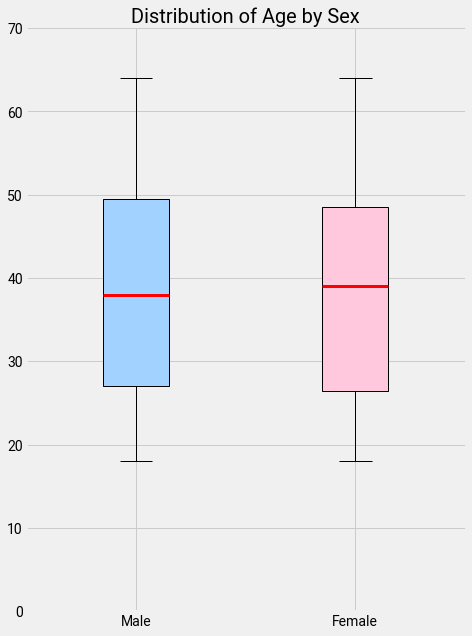

In [19]:
with plt.style.context(mpl):
    fig, ax = plt.subplots(figsize=(7, 10))
    male_smoker = smoker[smoker['sex'] == 'male']  
    female_smoker = smoker[smoker['sex'] == 'female']
    labels = ['Male', 'Female']  
    aaaa = [male_smoker['age'], female_smoker['age']]
    bp = ax.boxplot(aaaa, vert=True, patch_artist=True, widths = 0.3)
    ax.grid(visible=True)
    ax.set_xticklabels(['Male', 'Female']) 
    ax.set_ylim(0, 70)
    ax.set_title('Distribution of Age by Sex', fontsize=20)

    colors = [male_cat, female_cat] 

    for patch, color in zip(bp['boxes'], colors): patch.set_facecolor(color) 
    # changing color and linewidth of medians 
    for median in bp['medians']: median.set(color ='red', linewidth = 3) 


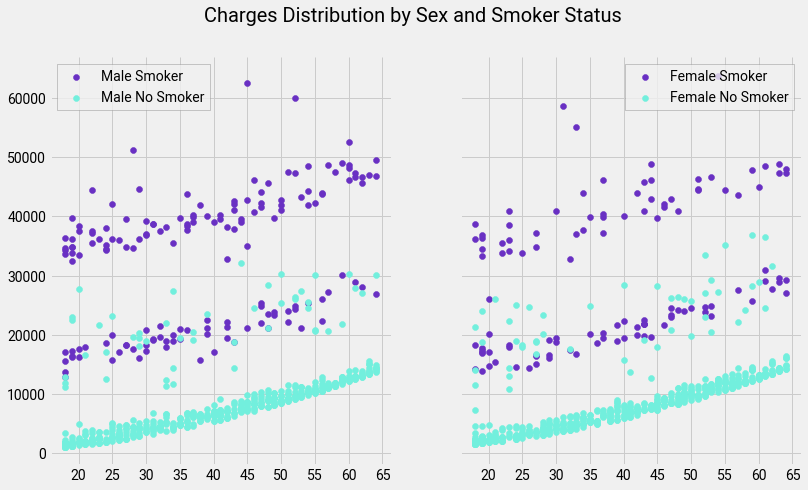

In [20]:
# male and female smoker are already present
male_no_smoker = insurance_data.loc[
    (insurance_data['smoker'] == 'no')
    &
    (insurance_data['sex'] == 'male')]
female_no_smoker = insurance_data.loc[
    (insurance_data['smoker'] == 'no')
    &
    (insurance_data['sex'] == 'female')]

with plt.style.context(mpl):  
    # plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharey=True,sharex=True)

    # cat: sex, dimension: age, charges
    ax1.scatter(male_smoker['age'], male_smoker['charges'], c=smoker_cat, label='Male Smoker')
    ax2.scatter(female_smoker['age'], female_smoker['charges'], c=smoker_cat, label='Female Smoker')
    ax1.scatter(male_no_smoker['age'], male_no_smoker['charges'], c=nosmoker_cat, label='Male No Smoker')
    ax2.scatter(female_no_smoker['age'], female_no_smoker['charges'], c=nosmoker_cat, label='Female No Smoker')

    ax1.legend(fontsize='medium', edgecolor='gray', fancybox=False)
    ax2.legend(fontsize='medium', edgecolor='gray', fancybox=False)

    plt.suptitle("Charges Distribution by Sex and Smoker Status", fontsize=20)

    tick_spacing = 5
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

    plt.show();

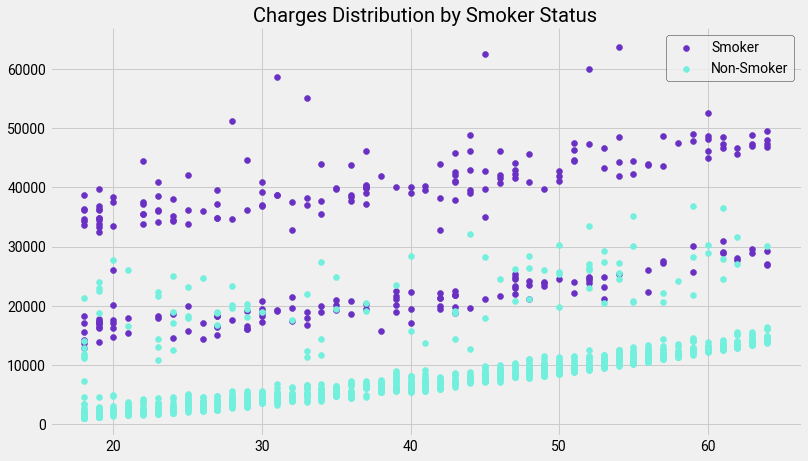

In [21]:
with plt.style.context(mpl): 
    fig, ax = plt.subplots(figsize=(12, 7))
    ax.scatter(smoker['age'], smoker['charges'], label='Smoker', c=smoker_cat)
    ax.scatter(no_smoker['age'], no_smoker['charges'], label='Non-Smoker', c=nosmoker_cat)
    ax.legend(edgecolor='black')
    ax.set_title("Charges Distribution by Smoker Status")

    plt.show();

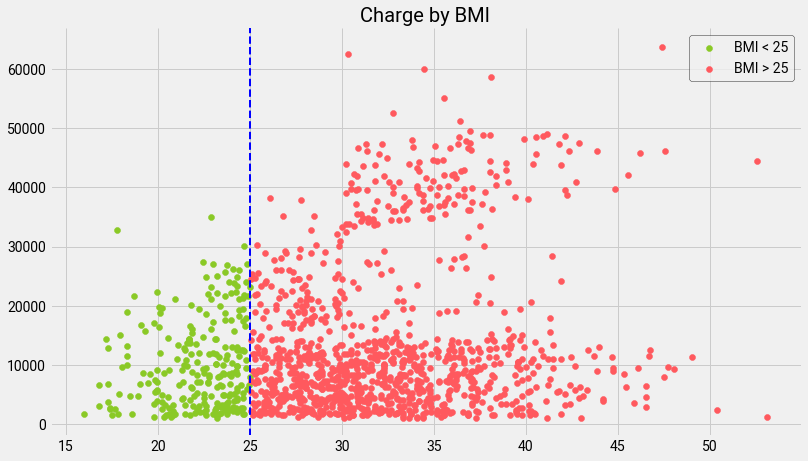

In [22]:
with plt.style.context(mpl): 
    bmi_l25 = insurance_data[insurance_data['bmi'] < 25]
    bmi_m25 = insurance_data[insurance_data['bmi'] > 25]

    fig, ax = plt.subplots(figsize=(12, 7))
    ax.scatter(bmi_l25['bmi'], bmi_l25['charges'], c=bmiL25_cat, label='BMI < 25')
    ax.scatter(bmi_m25['bmi'], bmi_m25['charges'], c=bmiM25_cat, label='BMI > 25')

    ax.axvline(x = 25, color = 'blue', linestyle='--', linewidth=2)
    ax.set_title('Charge by BMI')
    ax.legend(edgecolor='black')

    plt.show();